In [15]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer


print(sklearn.__version__)


1.5.2


In [17]:
df = pd.read_csv(r"C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\human-resources-analytics\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [18]:
X = df.drop(columns=['left'])
y = df['left'].astype('category')


In [ ]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

ct = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=[
        'object',
        'category',
    ])),
    (ohe, make_column_selector(dtype_include=[
        'object',
        'category',
    ])),
    verbose_feature_names_out=False,
).set_output(transform='pandas')

lr = LogisticRegression(random_state=24)

kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)

pipe = Pipeline([
    ("ct", ct), 
    ("lr", lr)
])

params = {
    "lr__solver": [
        "lbfgs",
        "liblinear",
        "newton-cg",
        "sag",
        "saga"
        "newton-cholesky"
    ],
    "lr__multi_class": [
        "ovr",
        "multinomial"
    ],
    "lr__C" : np.linspace(0.001, 100, 20),
}

gcv = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=kfold,
)

gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)


pd_cv = pd.DataFrame(gcv.cv_results_)
print(pd_cv.shape) 

{'lr__C': 10.527210526315788, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs'}
0.8026675558519505
(200, 16)


In [25]:
X_test = pd.read_csv(r"C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\human-resources-analytics\tst_hr.csv")

In [26]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.11,0.88,7,272,4,0,0,sales,medium
1,0.72,0.87,5,223,5,0,0,sales,low
2,0.37,0.52,2,159,3,0,0,sales,low
3,0.41,0.50,2,153,3,0,0,sales,low
4,0.67,0.61,3,202,2,0,0,technical,medium


In [40]:
best_lr = gcv.best_estimator_

y_pred = best_lr.predict(X_test)
y_pred_proba = best_lr.predict_proba(X_test)
print(y_pred)
print(pd.DataFrame(y_pred_proba).idxmax(axis=1).values)


[1 0 1 1 0 0 1 0 0 0 0 0 0 0 0]
[1 0 1 1 0 0 1 0 0 0 0 0 0 0 0]


A **confusion matrix** is a table that helps evaluate the performance of a classification model. It shows the comparison between actual and predicted values, helping identify where the model correctly or incorrectly predicted classes.

### Components of a Confusion Matrix:

For binary classification (e.g., two classes: Positive and Negative), the confusion matrix is a 2x2 table with:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive  | True Positive (TP) | False Negative (FN) |
| Actual Negative  | False Positive (FP) | True Negative (TN) |

#### Explanation of Terms:
- **True Positive (TP):** Correctly predicted positive instances.
- **False Positive (FP):** Incorrectly predicted as positive (Type I error).
- **False Negative (FN):** Incorrectly predicted as negative (Type II error).
- **True Negative (TN):** Correctly predicted negative instances.

### Performance Metrics from the Confusion Matrix:
- **Accuracy:** (TP + TN) / Total
- **Precision:** TP / (TP + FP) 
- **Recall (Sensitivity):** TP / (TP + FN)
- **F1 Score:** 2 * (Precision * Recall) / (Precision + Recall)
 

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [58]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=24, test_size=0.3, stratify=y)


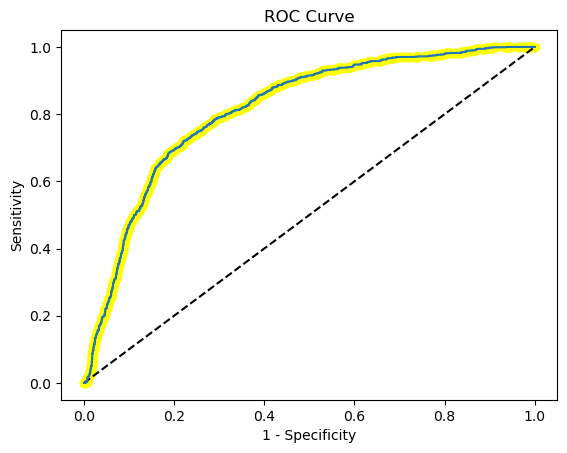

% of Area Under Curve (AUC) is :  81.30034368756864


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24,test_size=0.3, stratify=y)
# from sklearn.metrics import roc_curve, roc_auc_score
ohe = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore').set_output(transform='pandas')

ct = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(categories=[['technical', 'hr', 'sales', 'support', 'management', 'marketing',
                                        'RandD', 'product_mng', 'IT', 'accounting']]),['Department']),
    ('tnf2',OneHotEncoder(categories=[['medium', 'high', 'low']]),['salary'])
],remainder='passthrough')

kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)
log = LogisticRegression(random_state=24)
pipe = Pipeline([('CT',ct),('LOG',log)])

pipe.fit(X_train,y_train)
y_pred_prob = pipe.predict_proba(X_test)
p_y_1 =  y_pred_prob[:,1]


m1spec, senc, thresholds = roc_curve(y_test, p_y_1)
plt.plot([0,1],[0,1],'k--')
plt.plot(m1spec,senc)
plt.scatter(m1spec,senc,c='yellow')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.show()

print("% of Area Under Curve (AUC) is : ",roc_auc_score(y_test, p_y_1)*100)